# add noise to simulation data

## imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import data

In [9]:
# Load the data from the uploaded file
file_path = r'freq_pp_fit_test_data_pp.txt'
data = pd.read_csv(file_path, 
                   sep='\s+',
                   header=None, 
                   names=['frequency', 'NMR_response'])


/var/folders/0w/4p6nncwn1sscg1mzdtjhjpdh0000gn/T/ipykernel_15050/4266553197.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path,


## add noise to intensity

In [10]:
noise = np.random.normal(0, 
                         data['NMR_response'].std() * 0.1,  # 10% of the standard deviation as noise
                         size=len(data)) 
data['NMR_response_noisy'] = data['NMR_response'] + noise


## export data w noise

In [11]:
output_path = r'freq_pp_fit_test_data_pp_noisy.txt'
data[['frequency', 'NMR_response_noisy']].to_csv(output_path, sep=' ', header=True, index=False)

## simulated with the fit program

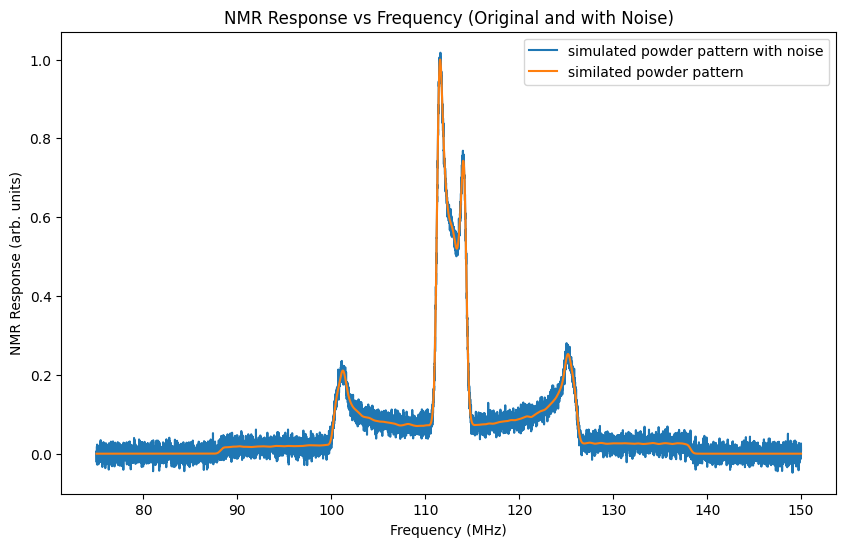

In [17]:
# Plot the original and noisy data
plt.figure(figsize=(10, 6))
plt.plot(data['frequency'], 
         data['NMR_response_noisy'], 
         label='simulated powder pattern with noise', 
         #linewidth=1.5, 
         #linestyle='--', 
         #alpha=0.7
         )
plt.plot(data['frequency'], 
         data['NMR_response'], 
         label='similated powder pattern', 
         #linewidth=1.5, 
         #alpha=0.7
         )
plt.xlabel('Frequency (MHz)')
plt.ylabel('NMR Response (arb. units)')
plt.title('NMR Response vs Frequency (Original and with Noise)')
plt.legend()
#plt.grid(True)
plt.show()

